In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # Import the ast module
import geopandas as gpd

# Load CSV data
df = pd.read_csv(r'zomato_df_final_data.csv')

### Part A 1.1 How many unique cuisines are served by Sydney restaurants?

Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Length: 134, dtype: int64


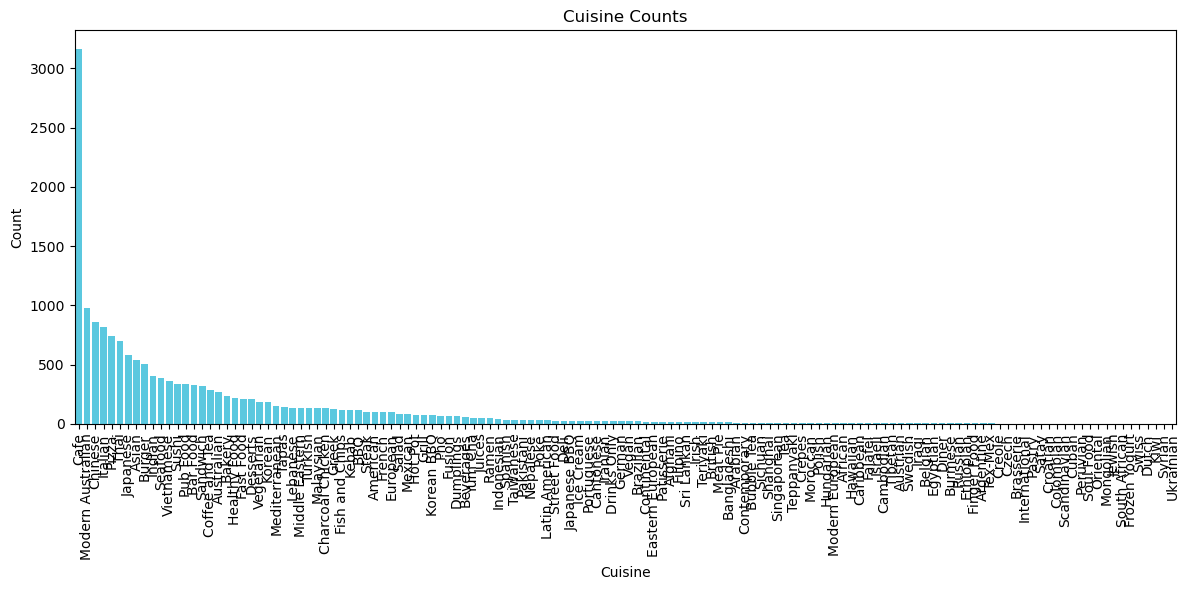

In [11]:
# Access the 'cuisine' column in DataFrame df and convert it to a string
df['cuisine'] = df['cuisine'].apply(eval)

# Create an empty dictionary to store the statistics of delicious food and its count
cuisine_dict = {}

# Traverse all values in the 'cuisine' column
for cuisines_list in df['cuisine']:
    for cuisine in cuisines_list:
        if cuisine in cuisine_dict:
            cuisine_dict[cuisine] += 1
        else:
            cuisine_dict[cuisine] = 1

# Create a Pandas Series from the dictionary
cuisine_series = pd.Series(cuisine_dict)

# Sort the Series by values in order
cuisine_series_sorted = cuisine_series.sort_values(ascending=False)

# Display the sorted counts
print(cuisine_series_sorted)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_series_sorted.index, y=cuisine_series_sorted.values, color='#45D6F5')
plt.title('Cuisine Counts')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Display the plot
plt.tight_layout()
plt.show()

### Part A 1.2 which suburbs (top-3) have the highest number of restaurants?

        Subzone  Count
0           CBD    792
1   Surry Hills    269
2    Parramatta    264
3     Chinatown    228
4  Darlinghurst    193
The subzone(s) with the highest number of restaurants (792 restaurants): CBD


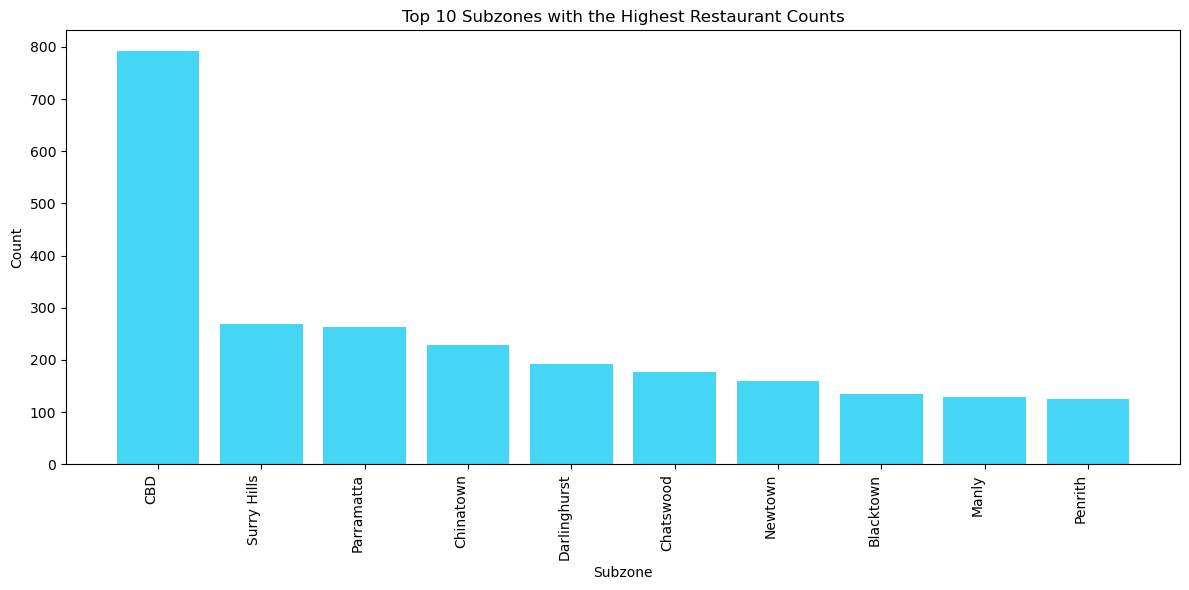

In [12]:
# Define a function to split and extract elements from a string
def extract_elements(value):
    elements = value.split(',')
    return [element.strip() for element in elements]

# Apply the extract_elements function to the "subzone" column and create a list of all elements
all_subzones = []
for value in df['subzone']:
    all_subzones.extend(extract_elements(value))

# Create a DataFrame to count the occurrences of each subzone
subzone_counts = pd.Series(all_subzones).value_counts().reset_index()
subzone_counts.columns = ['Subzone', 'Count']

# Find the subzone(s) with the highest number of restaurants
max_count = subzone_counts['Count'].max()
top_subzones = subzone_counts[subzone_counts['Count'] == max_count]['Subzone'].tolist()


# Display the DataFrame with subzone counts
print(subzone_counts.head(5))

# Print the subzone(s) with the highest number of restaurants
print(f"The subzone(s) with the highest number of restaurants ({max_count} restaurants): {', '.join(top_subzones)}")

# Get the top 10 suburbs with the highest restaurant counts
top_10_suburbs = subzone_counts.head(10)

# Create a bar chart to get the top 10 suburbs with the highest restaurant counts
plt.figure(figsize=(12, 6))
plt.bar(top_10_suburbs['Subzone'], top_10_suburbs['Count'], color='#45D6F5')
plt.title('Top 10 Subzones with the Highest Restaurant Counts')
plt.xlabel('Subzone')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  

# Display the plot
plt.tight_layout()
plt.show()

### Part A 1.3 “Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please support your answer by numbers and visuals.

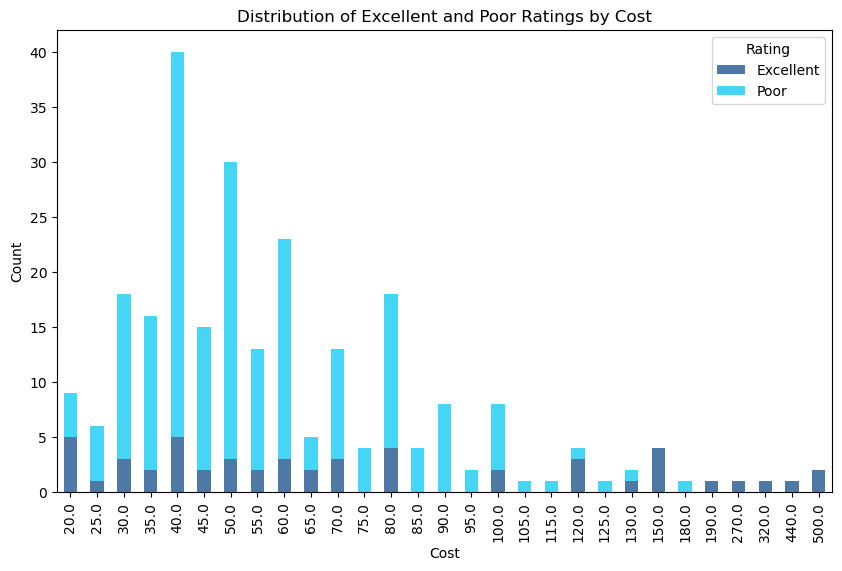

In [13]:
#1.3
# Filter rows with 'Excellent' and 'Poor' ratings
df_filtered = df[df['rating_text'].isin(['Excellent', 'Poor'])]

# Create a crosstab to count occurrences of 'rating_text' for each 'cost' category
ct = pd.crosstab(df_filtered['cost'], df_filtered['rating_text'])

# Define custom colors for 'Excellent' and 'Poor'
colors = ['#4E79A7', '#45D6F5']

# Plot a stacked bar chart with custom colors
ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Distribution of Excellent and Poor Ratings by Cost')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.legend(title='Rating', labels=['Excellent', 'Poor'])
plt.show()

##### According to the plot, the more expensive the restaurant, the higher the proportion of excellent reviews. Therefore, I agree with the view that restaurants rated 'excellent' are mostly very expensive, while restaurants rated 'poor' are rarely expensive.

### Part A 2.Perform exploratory analysis for the variables of the data - Cost

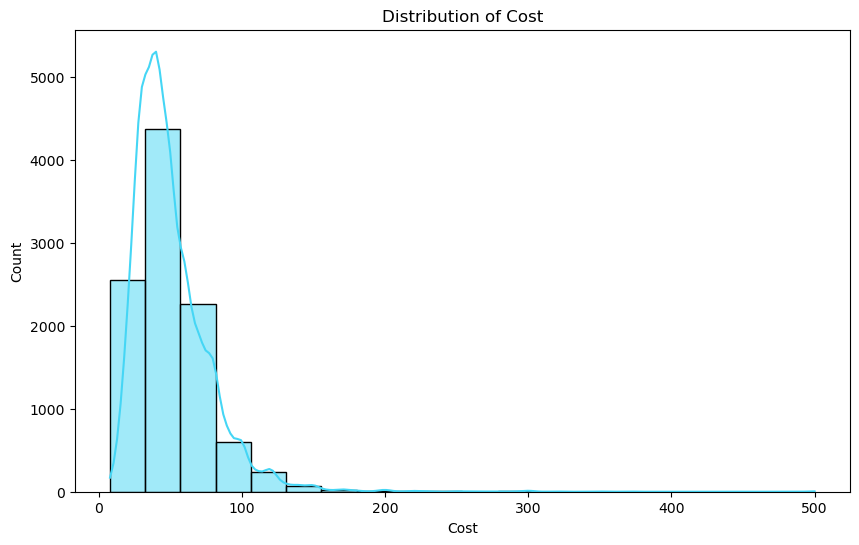

Descriptive Statistics for 'Cost':
 count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


In [14]:
# EDA for 'Cost'
plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], bins=20, kde=True, color='#45D6F5')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

# Descriptive insights for 'Cost'
cost_summary = df['cost'].describe()
print("Descriptive Statistics for 'Cost':\n", cost_summary)

### Part A 2.Perform exploratory analysis for the variables of the data - Rating

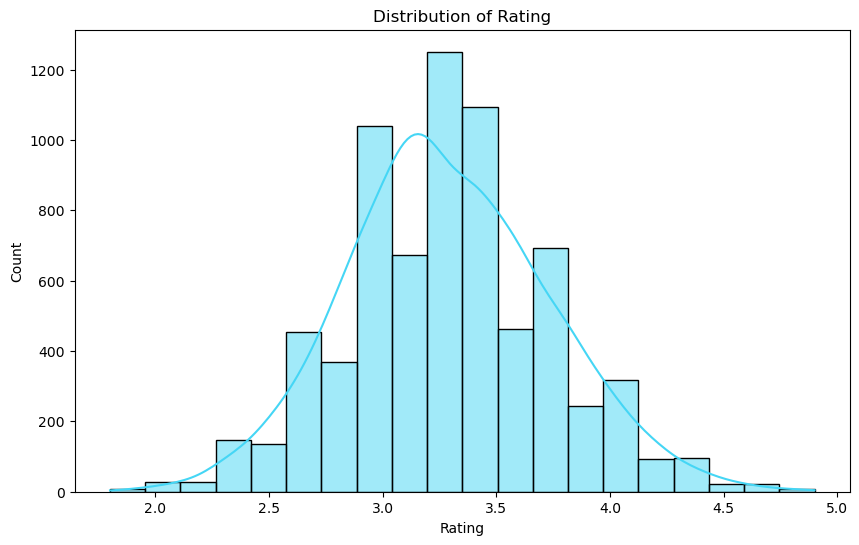

Descriptive Statistics for 'Rating':
 count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


In [15]:
# EDA for 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_number'], bins=20, kde=True, color='#45D6F5')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Descriptive insights for 'Rating'
rating_summary = df['rating_number'].describe()
print("Descriptive Statistics for 'Rating':\n", rating_summary)

### Part A 2.Perform exploratory analysis for the variables of the data - Type

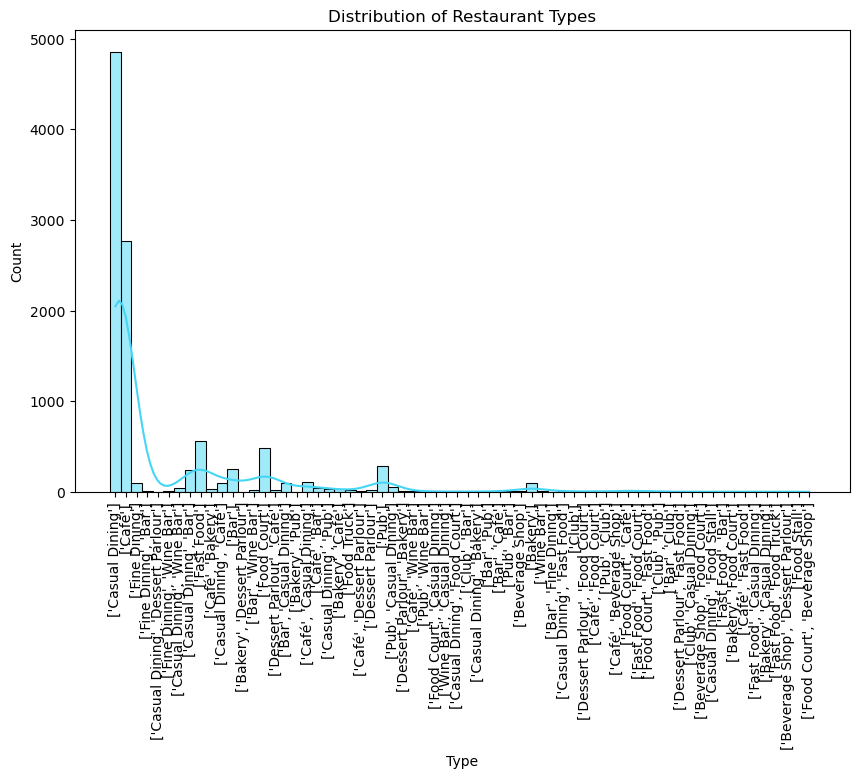

Counts for each Restaurant Type:
 count                 10452
unique                   66
top       ['Casual Dining']
freq                   4854
Name: type, dtype: object


In [16]:
# EDA for 'Type'
plt.figure(figsize=(10, 6))
sns.histplot(df['type'], bins=20, kde=True, color='#45D6F5')
plt.title('Distribution of Restaurant Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Descriptive insights for 'Type'
type_counts = df['type'].describe()
print("Counts for each Restaurant Type:\n", type_counts)

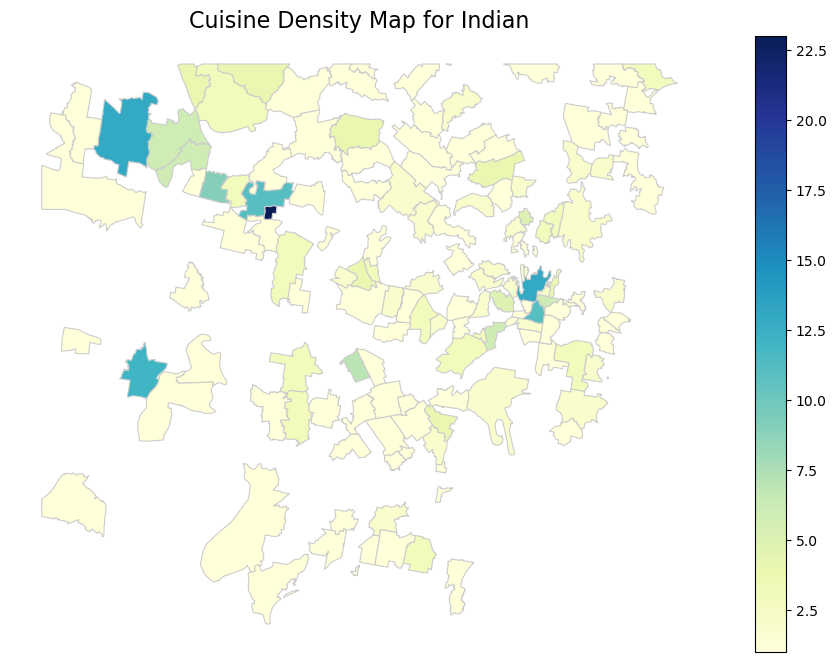

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def show_cuisine_densitymap(cuisine='Indian'):
    # Load the Sydney geojson file
    sydney_geo = gpd.read_file('sydney.geojson')

    # Filter restaurants serving the specified cuisine
    cuisine_restaurants = df[df['cuisine'].str.contains(cuisine, case=False, na=False)]

    # Convert the restaurant data to a GeoDataFrame
    gdf_restaurants = gpd.GeoDataFrame(cuisine_restaurants, 
                                       geometry=gpd.points_from_xy(cuisine_restaurants['lng'], cuisine_restaurants['lat']))

    # Set the CRS for the 'gdf_restaurants' GeoDataFrame to match 'sydney_geo'
    gdf_restaurants.crs = sydney_geo.crs

    # Spatial join to count restaurants per suburb
    joined = gpd.sjoin(sydney_geo, gdf_restaurants, predicate='contains')

    # Group by suburb and count the number of restaurants
    suburb_cuisine_counts = joined.groupby('SSC_NAME').size().reset_index(name='restaurant_count')

    # Merge the data back with the Sydney geojson
    merged = sydney_geo.merge(suburb_cuisine_counts, on='SSC_NAME', how='left')

    # Plot the cuisine density map
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.axis('off')  # Turn off axis
    ax.set_title(f'Cuisine Density Map for {cuisine}', fontsize=16)
    
    # Plot the map with color-coded suburbs based on the number of restaurants serving the cuisine
    merged.plot(column='restaurant_count', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.show()
